ChEn-3170: Computational Methods in Chemical Engineering Spring 2021 UMass Lowell; Prof. V. F. de Almeida **02Feb21**

# 03. Arrays
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Introduction](#introduction)
    
    
* [NumPy Package](#numpy)
 - [1-D (vector)](#1d)
    + [Magnitude](#vecmag)
    + [Important: shared data](#nb)
 - [2-D (matrix)](#2d)
   + [Visualization](#plot)
 - [3-D (brick or block or cube)](#3d)
   + [Color image as a 3D Brick (RGB)](#image)
    
    
* [Array Slicing (or Views)](#views)
 - [Regular Sampling (Filtering)](#regularsampling)
 - [Irregular Sampling (Filtering)](#irregularsampling)
    
    
* [Notable Vectors](#notablevec)
* [Notable Matrices](#notablemtrx)
 - [Zero matrix](#zeromtrx)
 - [All ones matrix](#onesmtrx)
 - [Any constant matrix](#ctemtrx)
 - [Empty matrix](#emptymtrx)
 - [$\Imtrx$: Identity matrix](#identitymtrx)   
 - [$\Lmtrx$: Lower triangular matrix](#lmtrx)
 - [$\Umtrx$: Upper triangular matrix](#umtrx)
------

## [Objectives](#toc)<a id="obj"></a>

 + Expand on data structures convered so far to include multidimensional arrays for scientific computing.
 + Cover essential elements of data layout for scientific computing.
 + Experiment with views/slices of arrays using visualization (Matplotlib).

## [Introduction](#toc)<a id="introduction"></a>
Arrays are containers of data in a structured form, *i.e.* in a *block* layout. This course uses the n-dimensional array Python package:
+ [NumPy](http://www.numpy.org/): `ndarray` (n-dimensional or multi-dimensional array).
+ [Quick-start tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html):
we need to import `numpy` into the Python interpreter.

## [NumPy Package](#toc)<a id="numpy"></a>
All packages in Python are imported into your session using the `import` *statement*.

In [1]:
'''Python packages are accessed with an import directive as such:'''

import numpy as np  # import the package and create the alias: np

### [One-dimensional array (or vector)](#toc)<a id="1d"></a>
A one-dimensional array or **vector** is an ordered sequence of data types.

In [2]:
'''Loading data into "ndarray" using built-in Python data types and the "np.array()" method'''

pylist = [4.5, 8, 90, 1e2, 2.3e-5]   # create a native Python list

mass_cc = np.array( pylist )  # array() takes a list and converts it into a ndarray

print('mass_cc type =',type(mass_cc))
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =',mass_cc.shape) 
print('mass_cc =',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 5
mass_cc shape = (5,)
mass_cc = [4.5e+00 8.0e+00 9.0e+01 1.0e+02 2.3e-05]
mass_cc entry dtype = float64


In [3]:
#help(np.array)

In [4]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('mass_cc =',mass_cc)
print('2.0 * mass_cc     = ', 2 * mass_cc)
print('2.0 / mass_cc     = ', 2 / mass_cc)
print('mass_cc**2        = ', mass_cc**2)

mass_cc = [4.5e+00 8.0e+00 9.0e+01 1.0e+02 2.3e-05]
2.0 * mass_cc     =  [9.0e+00 1.6e+01 1.8e+02 2.0e+02 4.6e-05]
2.0 / mass_cc     =  [4.44444444e-01 2.50000000e-01 2.22222222e-02 2.00000000e-02
 8.69565217e+04]
mass_cc**2        =  [2.025e+01 6.400e+01 8.100e+03 1.000e+04 5.290e-10]


In [5]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('mass_cc - mass_cc =', mass_cc - mass_cc)

mass_cc_new = np.random.random(5) # a quick way to populate a vector with 0->1 random numbers

print('mass_cc - mass_cc_new =', mass_cc - mass_cc_new)

mass_cc - mass_cc = [0. 0. 0. 0. 0.]
mass_cc - mass_cc_new = [ 4.11316312  7.68682933 89.46817857 99.00715336 -0.65509761]


In [6]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('np.log(mass_cc) = ', np.log(mass_cc))

np.log(mass_cc) =  [  1.5040774    2.07944154   4.49980967   4.60517019 -10.68001634]


In [7]:
'''NumPy has a very rich set of algebraic operations on arrays; a few examples'''

print('mass_cc =',mass_cc)
print('mean(mass_cc)     = ', np.mean(mass_cc))
print('var(mass_cc)      = ', np.var(mass_cc))
print('std(mass_cc)      = ', np.std(mass_cc))
print('sum(mass_cc)      = ', np.sum(mass_cc))

mass_cc = [4.5e+00 8.0e+00 9.0e+01 1.0e+02 2.3e-05]
mean(mass_cc)     =  40.5000046
var(mass_cc)      =  1996.5996274000845
std(mass_cc)      =  44.68332605570096
sum(mass_cc)      =  202.500023


In [8]:
'''Loading data into "ndarray" using built-in Python data types and the "np.array()" method'''

species_set = {'water','argon','O2','N2'}

species = np.array( species_set )  

print('species type =',type(species))
print('***species length*** =',species.size)
print('species =',species)
print('***species entry dtype*** =',species.dtype)

species type = <class 'numpy.ndarray'>
***species length*** = 1
species = {'O2', 'N2', 'argon', 'water'}
***species entry dtype*** = object


In [9]:
'''Build an ndarray with the workhorse "np.linspace()" method'''

mole_vec = np.linspace( 1e-3, 1.0, 6 )         # linspace() is a method of numpy

print('mole_vec type =',type(mole_vec))        # type introspection in python
print('mole_vec length =',mole_vec.size)       # vector length or size
print('mole_vec =',mole_vec)
print('mole_vec entry dtype =',mole_vec.dtype) # inquire about the internal data type in numpy

mole_vec type = <class 'numpy.ndarray'>
mole_vec length = 6
mole_vec = [0.001  0.2008 0.4006 0.6004 0.8002 1.    ]
mole_vec entry dtype = float64


In [10]:
#help(np.linspace)  # help for linspace()

In [11]:
'''Now create a mole fraction data array'''

mole_sum = mole_vec.sum()                 # "sum()" method adds all elements in "mole_vec"
mole_frac = mole_vec / mole_sum           # operation: the "mole_vec" array is divided by the "mole_sum"
print('')
print('mole_frac =',mole_frac)
print('sum       =',mole_frac.sum())      # using sum method of mole_frac


mole_frac = [0.000333   0.06686647 0.13339993 0.1999334  0.26646687 0.33300033]
sum       = 1.0


In [12]:
#dir(mole_frac)   # list of methods and attributes available for the `mole_frac` object

In [13]:
#help(mole_frac.sum)  # help for the sum method of `mole_frac` or `ndarray`

In [14]:
#help(np.sum)  # help for the build-in function in `numpy`

In [15]:
print('sum =', np.sum(mole_frac)) # another way to sum using numpy built-in function np.sum()

sum = 1.0


In [16]:
'''Accessing "ndarray" data with the indexing operator []'''

print('mole_frac    =\n',mole_frac,'\n')
print('mole_frac[0] =',mole_frac[0])   # access the offset 0 item
print('mole_frac[4] =',mole_frac[4])   # access the offset 4 item

'''Accessing slices'''

print('')
print('mole_frac[3:6]       =', mole_frac[3:6])    # print from index 3 to index 6-1

mole_frac    =
 [0.000333   0.06686647 0.13339993 0.1999334  0.26646687 0.33300033] 

mole_frac[0] = 0.000333000333000333
mole_frac[4] = 0.26646686646686646

mole_frac[3:6]       = [0.1999334  0.26646687 0.33300033]


In [17]:
'''Accessing "ndarray" data with the indexing operator []'''

'''Modify slice data'''

mole_frac[3:6] *= 3.2                              # modify the slice by multiplying in-place by 3.2
print('mole_frac[3:6] * 3.2 =', mole_frac[3:6])    # print result

# same as this
#tmp = mole_frac[3:6] * 3.2
#mole_frac[3:6] = tmp

mole_frac[3:6] * 3.2 = [0.63978688 0.85269397 1.06560107]


#### [Vector Magnitude](#toc)<a id="vecmag"></a>

In [18]:
'''Vector magnitude'''

'''one way'''
tmp = mole_frac * mole_frac              # element-by-element multiplication of the vector
print('tmp =\n',tmp,'\n')

mag = np.sqrt( tmp.sum() )               # sum of all elements in tmp and take the sqrt
print('magnitude of mole_frac = ', mag )

tmp =
 [1.10889222e-07 4.47112439e-03 1.77955422e-02 4.09327252e-01
 7.27087011e-01 1.13550563e+00] 

magnitude of mole_frac =  1.5146572784421302


In [19]:
'''Vector magnitude another way'''

mag = np.sqrt( np.dot(mole_frac, mole_frac) )  # use the inner product

print('magnitude of mole_frac = ', mag )

magnitude of mole_frac =  1.5146572784421302


<a id="nb"></a>
<div class="alert alert-block alert-danger">
NB: Shared data concept in vectors extend to all arrays.
</div>

In [20]:
'''Vector View (Shared Data)'''

a_vec = np.random.random(6)  # useful of obtaining random data (0.0 to 1.0)     
print('a_vec =', a_vec)

b_vec = a_vec           # this is a "view" or alias of the entire a_vec

b_vec[1] = 0.0          # this will change a_vec too
print('b_vec =', b_vec)

a_vec = [0.79691333 0.53329861 0.71839926 0.93687228 0.07322797 0.39374771]
b_vec = [0.79691333 0.         0.71839926 0.93687228 0.07322797 0.39374771]


In [21]:
print('a_vec =', a_vec)

a_vec = [0.79691333 0.         0.71839926 0.93687228 0.07322797 0.39374771]


In [22]:
'''Vector View (Shared Data)'''

a_vec = np.random.random(6)       
print('a_vec =', a_vec)

print('')
b_vec = a_vec[3:]      # this is a view of a_vec data; not a copy
print('b_vec =', b_vec)

b_vec[:] = 0            # setting all elements of b_vec to zero
print('b_vec =', b_vec)

print('a_vec =', a_vec) # a_vec is also changed; shared data

a_vec = [0.50439252 0.93406097 0.60529177 0.02285875 0.39604677 0.78088448]

b_vec = [0.02285875 0.39604677 0.78088448]
b_vec = [0. 0. 0.]
a_vec = [0.50439252 0.93406097 0.60529177 0.         0.         0.        ]


In [23]:
'''Vector View (Shared Data)'''

b_vec = 1              # this assigns a new object to b_vec
print('b_vec =', b_vec)

print('a_vec =', a_vec) # note a_vec is left as before b_vec reassigned

b_vec = 1
a_vec = [0.50439252 0.93406097 0.60529177 0.         0.         0.        ]


**If you intend to use a copy of the data, use the `np.copy()` method**

In [24]:
'''Vector Copy'''

a_vec = np.random.random(8)
print('a_vec =', a_vec)

b_vec = np.copy(a_vec)      # this is an independent copy of a_vec

b_vec[0] = 0.0              # this will change mole_frac too
print('b_vec =', b_vec)

print('')
print('a_vec =', a_vec)

a_vec = [0.30766398 0.69483055 0.89963612 0.44128756 0.77413164 0.89000258
 0.77805255 0.86423825]
b_vec = [0.         0.69483055 0.89963612 0.44128756 0.77413164 0.89000258
 0.77805255 0.86423825]

a_vec = [0.30766398 0.69483055 0.89963612 0.44128756 0.77413164 0.89000258
 0.77805255 0.86423825]


### [Two-dimensional array (or matrix)](#toc)<a id="2d"></a>
A two-dimensional array or matrix, is a collection of data types ordered into rows and columns.

In [25]:
'''Using "array()" to create a 2-D "np.ndarray"'''

# create a native Python list of lists 

data = [ [4.5, 8  , 90, 1e12, 2.3e-5, -8  ],    # note line continuation
         [0  , 3.1, 10, 3000, 0.1234, -1.2],
         [3  , 5.9, 40, 1e-2, 2.3301, 78  ]
       ]

mass_cc = np.array( data )   # use the np.array( ) method to create the array

print('mass_cc type =',type(mass_cc))
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 18
mass_cc shape = (3, 6)
mass_cc =
 [[ 4.5000e+00  8.0000e+00  9.0000e+01  1.0000e+12  2.3000e-05 -8.0000e+00]
 [ 0.0000e+00  3.1000e+00  1.0000e+01  3.0000e+03  1.2340e-01 -1.2000e+00]
 [ 3.0000e+00  5.9000e+00  4.0000e+01  1.0000e-02  2.3301e+00  7.8000e+01]]
mass_cc entry dtype = float64


In [26]:
'''Not a matrix'''

data = [ [4.5,   8, 90, 1e12, 2.3e-5,   -8     ],   # note line continuation
         [0  , 3.1, 10, 3000, 0.1234, -1.2, 7.8],   # note extra element in this row; could be unintentional
         [3  , 5.9, 40, 1e-2, 2.3301,   78     ]
       ]
not_mtrx = np.array(data)

print('not_mtrx type =',type(not_mtrx))
print('not_mtrx length =',not_mtrx.size)        # check size with help(np.size)
print('not_mtrx shape =',not_mtrx.shape)        # check shape with help(np.shape)
print('not_mtrx =\n',not_mtrx)
print('not_mtrx entry dtype =',not_mtrx.dtype)  # check type with help(np.dtype)

not_mtrx type = <class 'numpy.ndarray'>
not_mtrx length = 3
not_mtrx shape = (3,)
not_mtrx =
 [list([4.5, 8, 90, 1000000000000.0, 2.3e-05, -8])
 list([0, 3.1, 10, 3000, 0.1234, -1.2, 7.8])
 list([3, 5.9, 40, 0.01, 2.3301, 78])]
not_mtrx entry dtype = object


<ipython-input-26-7b044490032c>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  not_mtrx = np.array(data)


In [27]:
'''Access elements of the 2-D array; use double indexing, e.g., name[i,j]'''
# i -> row index
# j -> column index

print('mass_cc[0,0] =', mass_cc[0,0])   # single element on with index 0,0
print('mass_cc[1,1] =', mass_cc[1,1])   # single element on with index 1,1

mass_cc[0,0] = 4.5
mass_cc[1,1] = 3.1


In [28]:
'''More on using "array()" to create a 2-D "np.ndarray"'''

# create a native Python list of 5-element objects 
data = [ np.linspace(1,5,5),         # first row   5 elements
         range(5),                   # second row  5 elements
         np.random.random(5)*3.0     # third row   5 elements  
       ]

mass_cc = np.array(data)  # mass concentration is non-negative

print('mass_cc type =',type(mass_cc))
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc shape = (3, 5)
mass_cc length = 15
mass_cc =
 [[1.         2.         3.         4.         5.        ]
 [0.         1.         2.         3.         4.        ]
 [1.21604043 1.67703093 2.44519806 2.16888616 2.37468699]]
mass_cc entry dtype = float64


In [29]:
'''Views of the 2-D array'''

print('mass_cc "1st" row =',mass_cc[0,:])  # use the colon operator inside the indexing operator
print('mass_cc "2nd" row =',mass_cc[1,:])  # use the colon operator inside the indexing operator
print('mass_cc "3nd" row =',mass_cc[2,:])  # use the colon operator inside the indexing operator
print('')
print('mass_cc "1st" column =',mass_cc[:,0])  # use the colon operator inside the indexing operator
print('mass_cc "2nd" column =',mass_cc[:,1])  # use the colon operator inside the indexing operator
print('mass_cc "3rd" column =',mass_cc[:,2])  # use the colon operator inside the indexing operator
print('mass_cc "4th" column =',mass_cc[:,3])  # use the colon operator inside the indexing operator
print('mass_cc "5th" column =',mass_cc[:,4])  # use the colon operator inside the indexing operator

mass_cc "1st" row = [1. 2. 3. 4. 5.]
mass_cc "2nd" row = [0. 1. 2. 3. 4.]
mass_cc "3nd" row = [1.21604043 1.67703093 2.44519806 2.16888616 2.37468699]

mass_cc "1st" column = [1.         0.         1.21604043]
mass_cc "2nd" column = [2.         1.         1.67703093]
mass_cc "3rd" column = [3.         2.         2.44519806]
mass_cc "4th" column = [4.         3.         2.16888616]
mass_cc "5th" column = [5.         4.         2.37468699]


#### Visualization of matrices with [Matplotlib](https://matplotlib.org/index.html)<a id="plot"></a>

All packages in Python are imported into your session using the `import` *statement*.
<div class="alert alert-block alert-info">
Plotting for the most part will use the Python package `Matplotlib`.
</div>

In [30]:
'''Example: visualize a matrix as image'''

'''scale the matrix to 0-1'''
#tmp = mass_cc / mass_cc.max()    # element by element division
#mass_cc = tmp                    # reassigment

mass_cc /= mass_cc.max()          # scaling on the fly; same as previous two

'''scale the matrix to 0-255'''
mass_cc *= 255

print(mass_cc)

[[ 51.         102.         153.         204.         255.        ]
 [  0.          51.         102.         153.         204.        ]
 [ 62.01806176  85.5285776  124.70510113 110.61319395 121.1090363 ]]


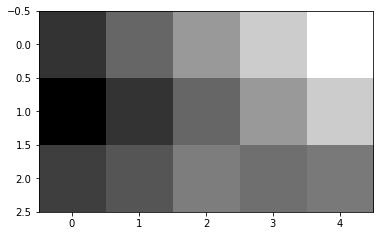

In [31]:
'''Visualize the matrix'''

from matplotlib import pyplot as plt  # import the pyplot function of the matplotlib package
%matplotlib inline

plt.figure(1)    # create a figure placeholder

# show data as an image (as opposed to a plot)
plt.imshow( mass_cc, cmap='gray' ) # method call with arguments: mass_cc, a "named" argument cmap

plt.show()

In [32]:
print('mass_cc upper left quadrant =\n', mass_cc[0:2,0:2])

mass_cc upper left quadrant =
 [[ 51. 102.]
 [  0.  51.]]


In [33]:
print('mass_cc upper right quadrant =\n', mass_cc[0:2,-2:])

mass_cc upper right quadrant =
 [[204. 255.]
 [153. 204.]]


In [34]:
'''Zeros matrix'''

mass_cc = np.zeros( (4,3) )     # 4x3 matrix with zeros
print('zero matrix (4,3) =\n',mass_cc)

zero matrix (4,3) =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [35]:
'''Identity matrix: I ("square"; i.e.: m x m; m rows and m columns)'''

mass_cc = np.eye(4,4)
print('identity matrix (4,4) =\n',mass_cc)

identity matrix (4,4) =
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [36]:
'''Diagonal matrix (square; m x m, m rows and m columns)'''

mass_cc = np.diag( range(7) )    # provide the diagonal as a vector
print('diagonal (7x7) =\n',mass_cc)

diagonal (7x7) =
 [[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 4 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


In [37]:
'''Extract the diagonal of a matrix (square; m x m, m rows and m columns)'''

print('diagonal = ', np.diagonal(mass_cc)) # np diagonal method
print('diagonal = ', mass_cc.diagonal())   # matrix diagonal method

diagonal =  [0 1 2 3 4 5 6]
diagonal =  [0 1 2 3 4 5 6]


In [38]:
#help(np.diagonal)

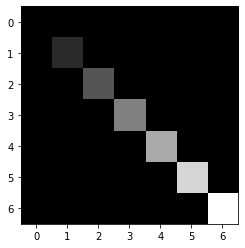

In [39]:
'''Visualize a matrix as image'''
from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

plt.figure(2)                      # create a figure placeholder

plt.imshow( mass_cc, cmap='gray' ) # show image data

plt.show()

### [Three-dimensional array (brick or block or cube)](#toc)<a id="3d"></a>

In [40]:
'''Using "array()" to create a 3-D "np.ndarray"'''

# create a native Python list of lists of lists

data = [
        [ [4.5,   8, 90, 1e12, 2.3e-5],    # 1st matrix
          [0  , 3.1, 10, 3000, 0.1234]
        ],
        [ [2.1,   -7, 31, 2e12, 0.22],     # second matrix
          [  0,  1.1, 21, 3876, 1024]
        ],
        [ [1,   -7,  4,    0, 0.22],     # third matrix
          [0,  1.1, 21, -3e4, -234]
        ]
       ]

mass_cc = np.array(data)                      # create the ndarray

print('mass_cc type =',type(mass_cc))
print('mass_cc length =',mass_cc.size)        # check size with help(np.size)
print('mass_cc shape =',mass_cc.shape)        # check shape with help(np.shape)
print('mass_cc =\n',mass_cc)
print('mass_cc entry dtype =',mass_cc.dtype)  # check type with help(np.dtype)

mass_cc type = <class 'numpy.ndarray'>
mass_cc length = 30
mass_cc shape = (3, 2, 5)
mass_cc =
 [[[ 4.500e+00  8.000e+00  9.000e+01  1.000e+12  2.300e-05]
  [ 0.000e+00  3.100e+00  1.000e+01  3.000e+03  1.234e-01]]

 [[ 2.100e+00 -7.000e+00  3.100e+01  2.000e+12  2.200e-01]
  [ 0.000e+00  1.100e+00  2.100e+01  3.876e+03  1.024e+03]]

 [[ 1.000e+00 -7.000e+00  4.000e+00  0.000e+00  2.200e-01]
  [ 0.000e+00  1.100e+00  2.100e+01 -3.000e+04 -2.340e+02]]]
mass_cc entry dtype = float64


In [41]:
'''Access elements of the 3-D array; use triple indexing, e.g., variable_name[k,i,j]'''
# k -> depth index (stacking)
# i -> row index
# j -> column index

print('mass_cc[0,0,0] =',mass_cc[0,0,0])
print('mass_cc[2,1,4] =',mass_cc[2,1,4])

mass_cc[0,0,0] = 4.5
mass_cc[2,1,4] = -234.0


In [42]:
'''Views of the 3-D array'''

print('mass_cc "1st" stack =\n',mass_cc[0,:,:],'\n') # use the colon operator inside the indexing operator

print('mass_cc "2nd" stack =\n',mass_cc[1,:,:],'\n') # use the colon operator inside the indexing operator

print('mass_cc "3rd" stack =\n',mass_cc[2,:,:],'\n') # use the colon operator inside the indexing operator

mass_cc "1st" stack =
 [[4.500e+00 8.000e+00 9.000e+01 1.000e+12 2.300e-05]
 [0.000e+00 3.100e+00 1.000e+01 3.000e+03 1.234e-01]] 

mass_cc "2nd" stack =
 [[ 2.100e+00 -7.000e+00  3.100e+01  2.000e+12  2.200e-01]
 [ 0.000e+00  1.100e+00  2.100e+01  3.876e+03  1.024e+03]] 

mass_cc "3rd" stack =
 [[ 1.00e+00 -7.00e+00  4.00e+00  0.00e+00  2.20e-01]
 [ 0.00e+00  1.10e+00  2.10e+01 -3.00e+04 -2.34e+02]] 



In [43]:
'''3D Array of Random Numbers'''

# Say this is the result of an experiment measuring mass concentrations for multiple cases
mass_cc = np.random.random( (4,5,6) ) # random number generator in NumPy; pass only one argument; say tuple or list

mass_cc *= 255
mass_cc = mass_cc.astype(int)  # assign int data type

print('mass_cc =\n', mass_cc)
print('mass_cc shape =', mass_cc.shape)
print('mass_cc type =',mass_cc.dtype) 

mass_cc =
 [[[115 185 182 237  96 194]
  [191 221 172 172 129 196]
  [ 12 211  56  52   6  49]
  [  5  71 202 216 100 243]
  [151 232 204  98   6 198]]

 [[190  95  56  97 143   0]
  [ 94  47  68  24 184 129]
  [ 99 177  43 152  70  60]
  [253  44 177  43 247  61]
  [101  60 108  86 131  65]]

 [[  1 205   4  26  84  73]
  [227  31 212  52 145  85]
  [139 130  27 226  65  82]
  [110 205  74 232 189 235]
  [ 21  89 163  35 182 239]]

 [[108  64 224 254  99 139]
  [216 161 200  67 194  51]
  [125 205 102 224 150 115]
  [ 55 178 169 218 238 112]
  [106 243 187 100 217 140]]]
mass_cc shape = (4, 5, 6)
mass_cc type = int64


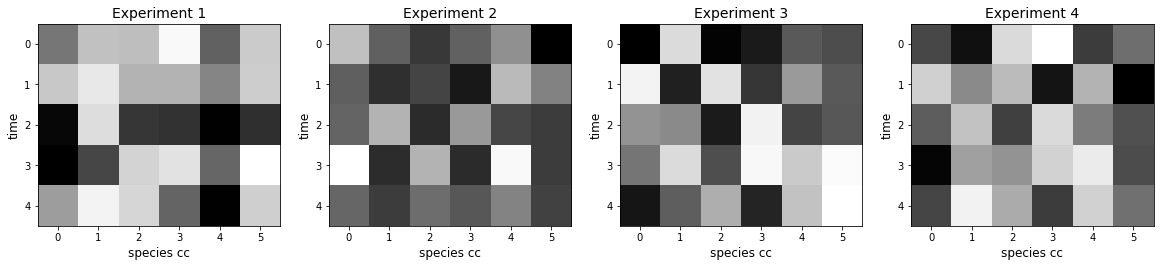

In [44]:
'''Visualize a 3-D Data Block'''

import numpy as np
from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

plt.figure(3)   # create a figure placeholder

plt.subplot(1,4,1)   # layout of plots: 1 row 4 columns

plt.imshow( mass_cc[0,:,:], cmap='gray' )  # show the "1st" stack

plt.title('Experiment 1',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(1,4,2)

plt.imshow( mass_cc[1,:,:],cmap='gray' ) # show the "2nd" stack

plt.title('Experiment 2',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(1,4,3)

plt.imshow( mass_cc[2,:,:],cmap='gray' ) # show the "3rd" stack

plt.title('Experiment 3',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.subplot(1,4,4)

plt.imshow( mass_cc[3,:,:],cmap='gray' ) # show the "4th" stack

plt.title('Experiment 4',fontsize=14)
plt.xlabel('species cc',fontsize=12)
plt.ylabel('time',fontsize=12)

plt.show()

In [45]:
'''Produce subplots for all matrix slices'''
#help(plt.subplot)

'Produce subplots for all matrix slices'

mass_cc shape = (4, 5, 6)


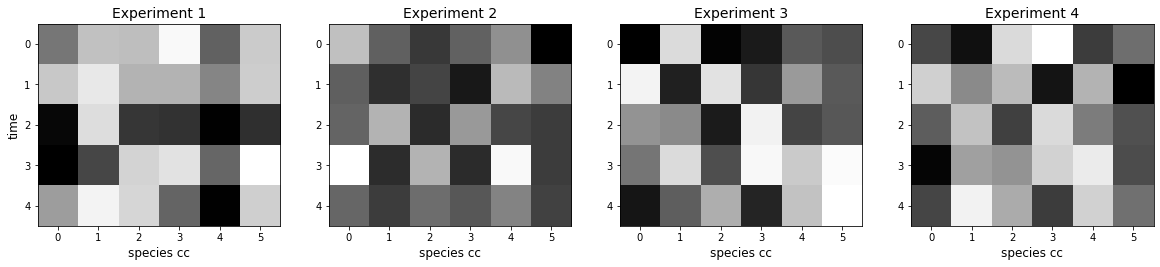

In [46]:
'''Look ahead: automate the Visualization of a 3D Block of Data'''

plt.figure(4)   # create a figure place holder

n_rows = 1                     # number of rows for plotting
n_columns = mass_cc.shape[0]   # number of columns for plotting
print('mass_cc shape =', mass_cc.shape)

# "loop": execution flow control
for i in range(n_rows*n_columns):
    
    plt.subplot( n_rows, n_columns, i+1 )      # create subplot
    
    plt.imshow( mass_cc[i,:,:], cmap='gray' ) # show data in subplot
    
    plt.title('Experiment '+str(i+1),fontsize=14)
    plt.xlabel('species cc',fontsize=12)
    if i == 0: 
        plt.ylabel('time',fontsize=12)

plt.show()

mass_cc shape = (8, 5, 6)


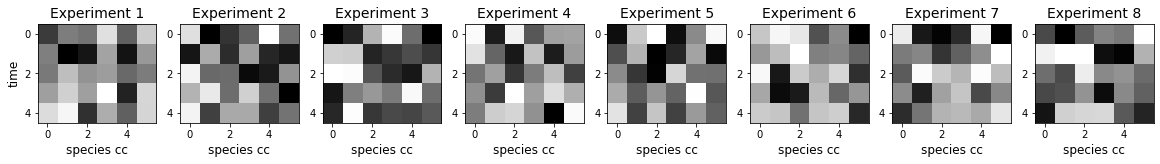

In [47]:
'''More on automation...'''

# Let's try a larger brick data set

mass_cc = np.random.random( (8,5,6) ) # random number generator in NumPy; pass only one argument; say tuple or list

mass_cc *= 255
mass_cc = mass_cc.astype(int)  # assign int data type

n_rows = 1                    # number of rows for plotting
n_columns = mass_cc.shape[0]   # number of columns for plotting
print('mass_cc shape =', mass_cc.shape)

# "loop": execution flow control
for i in range(n_columns*n_rows):
    
    plt.subplot( n_rows, n_columns, i+1 )      # create subplot
    
    plt.imshow( mass_cc[i,:,:], cmap='gray' ) # show data in subplot
    
    plt.title('Experiment '+str(i+1),fontsize=14)
    plt.xlabel('species cc',fontsize=12)
    if i == 0:
        plt.ylabel('time',fontsize=12)

plt.show()

In [48]:
#help(plt.imshow)

#### [Color Image as a 3D Array](#toc)<a id="image"></a>

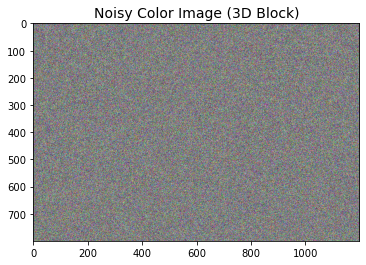

In [49]:
'''Color Image as a 3D Block Array'''

# Another example of block array data structure

plt.figure(5)       # create a figure place holder

# Note the indices values
color_image = np.random.random( (800,1200,3) )  # 3 channels: R, G, B

plt.imshow( color_image )
plt.title('Noisy Color Image (3D Block)',fontsize=14)

plt.show()

**$\Rightarrow$ Color image pixel numbering starts at the upper left corner: 800 x 1200.**

## [Array Slicing (or Views; see [NB](#nb))](#toc)<a id="views"></a>
Slicing or views are subset of data contained in a given array. Data is accessed using indexing operation, `[]`, in conjunction with the colon operator `:`.

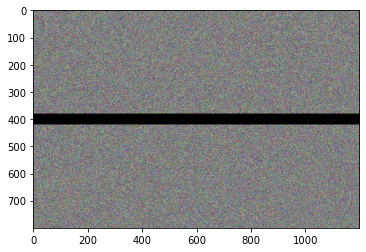

In [50]:
'''Visualize Data Slice in 3D'''

color_image[380:420,:,:] = 0  # horizontal black color stripe

plt.figure(6)
plt.imshow( color_image )
plt.show()

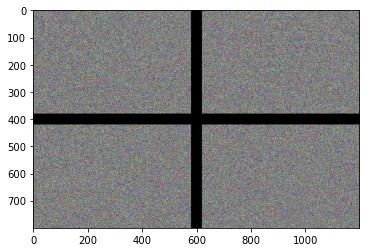

In [51]:
color_image[:,580:620,:] = 0   # vertical black color stripe

plt.figure(6)
plt.imshow( color_image )
plt.show()

**$\Rightarrow$ We just saw how an image representation of a brick (3D) array can be made. The opposite is also possible, that is we can read a color image from file as a brick (3D) array.**

In [52]:
'''Image Reading into a Python Session'''

#help(plt.imread)   # use the matplotlib package

'Image Reading into a Python Session'

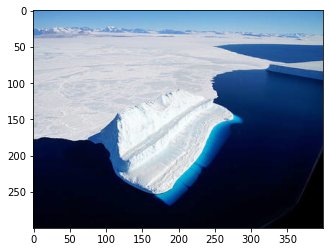

block type = <class 'numpy.ndarray'>
block shape = (300, 400, 3)
block type = float32


In [53]:
'''3-D Block Visualization of Color Images'''

# Read (using Matplotlib) image from the images/ directory in the chen-3170 repo
#block = plt.imread( 'images/glacier.png', format='png' )

# Read (using Matplotlib) image from the online course repository directory in the chen-3170
block = plt.imread( 'https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/glacier.png', format='png' ) 
    
#wrk_copy = np.copy(block) # if a copy is needed to work on the data

plt.imshow(block)
plt.show()

print('block type =',type(block))  # inspect the array shape
print('block shape =',block.shape)  # inspect the array shape
print('block type =',block.dtype)  # inspect the array data type

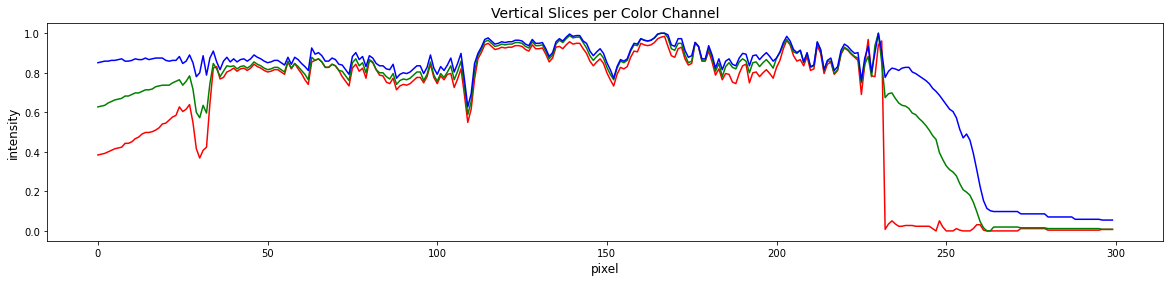

In [54]:
'''Vertical Slice (View)'''

r_vec = block[:,200,0] # slice the red channel (stack) at column 200
g_vec = block[:,200,1] # slice the green channel (stack) at column 200
b_vec = block[:,200,2] # slice the blue channel (stack) at column 200

n_pixels = block.shape[0] # get number of pixels in the image's vertical direction

plt.plot( range(n_pixels), r_vec,'r', g_vec,'g', b_vec,'b' ) # plot all three slices

plt.title('Vertical Slices per Color Channel',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)

plt.show()

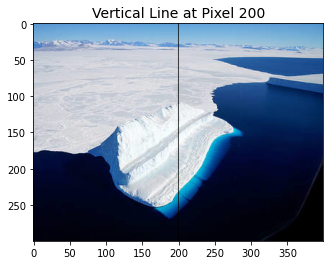

In [55]:
'''Indicate the Vertical Slice Position'''

block_mod = block        # note block_mod shares data with block

block_mod[:,200,:] = 0  # set all channels to zero (black) on the vertical center line

plt.imshow(block_mod)

plt.title('Vertical Line at Pixel 200',fontsize=14)
plt.show()

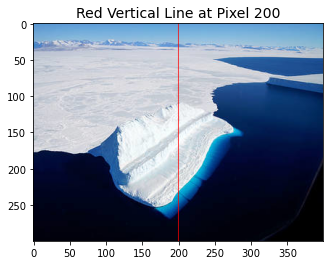

In [56]:
'''Change Color of the Vertical Line'''

block_mod[:,200,0] = 1   # set the red channel to 1
block_mod[:,200,1] = 0   # set the others to zero (already were)
block_mod[:,200,2] = 0   # not needed; already zero

plt.imshow(block_mod)
plt.title('Red Vertical Line at Pixel 200',fontsize=14)
plt.show()

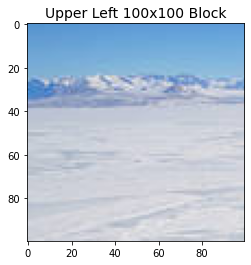

In [57]:
'''Create a "View" of the Data'''

sub_block = block[:100,:100,:]  # upper left 100x100 sub-block of the data

plt.imshow(sub_block)

plt.title('Upper Left 100x100 Block',fontsize=14)
plt.show()

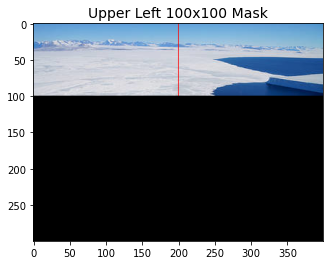

In [58]:
'''Mask the 100x100 Data'''

masked = block           # shared data

masked[100:,:,:] = 0     # lower sub-block mask
plt.imshow(masked)

plt.title('Upper Left 100x100 Mask',fontsize=14)
plt.show()

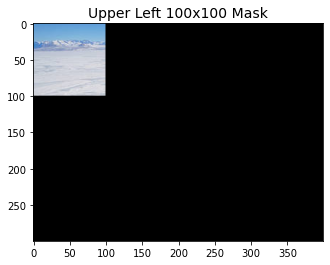

In [59]:
'''Mask the 100x100 Data'''

masked[:,100:,:] = 0     # right sub-block mask
plt.imshow(masked)

plt.title('Upper Left 100x100 Mask',fontsize=14)
plt.show()

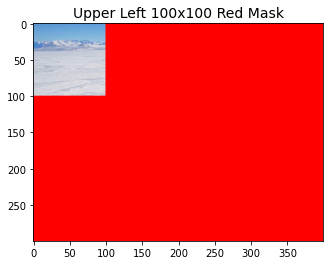

In [60]:
'''Red Mask the 100x100 Data'''

masked = block

masked[100:,:,0] = 1     # lower sub-block mask
plt.imshow(masked)

masked[:,100:,0] = 1     # right sub-block mask
plt.imshow(masked)

plt.title('Upper Left 100x100 Red Mask',fontsize=14)
plt.show()

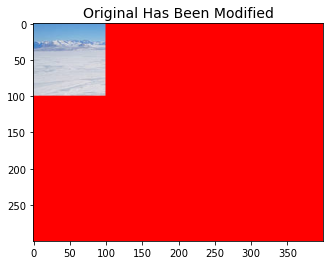

In [61]:
'''View the Original Block'''

plt.imshow(block)  # the image has been modified all along

plt.title('Original Has Been Modified',fontsize=14)
plt.show()

### [Regular Sampling or Filtering](#toc)<a id="regularsampling"></a>

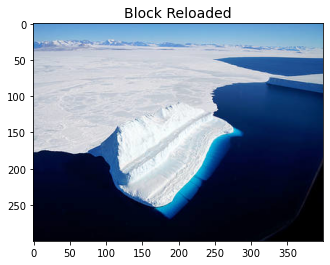

block type = <class 'numpy.ndarray'>
block shape = (300, 400, 3)


In [62]:
'''Reload Block Data'''

# Read (Matplotlib) image from the images/ directory in the chen-3170 repo
block = plt.imread('images/glacier.png',format='png')

plt.imshow(block)  # plot the 3-D data as an image

plt.title('Block Reloaded',fontsize=14)
plt.show()

print('block type =',type(block))  # inspect the array shape
print('block shape =',block.shape)  # inspect the array shape

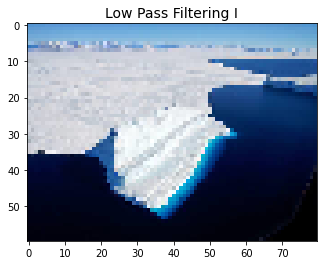

coarse shape = (60, 80, 3)


In [63]:
'''Coarsening the Data; low pass filter'''

coarse = block[::5,::5,:]   # use the step option in the colon operator indexing

plt.imshow(coarse)

plt.title('Low Pass Filtering I',fontsize=14)
plt.show()
print('coarse shape =', coarse.shape)

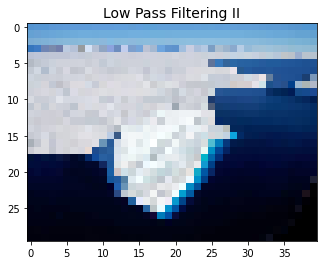

very_coarse = (30, 40, 3)


In [64]:
'''More Coarsening of the Data; low pass filter'''

very_coarse = block[::10,::10,:]

plt.imshow(very_coarse)
plt.title('Low Pass Filtering II',fontsize=14)
plt.show()
print('very_coarse =', very_coarse.shape)

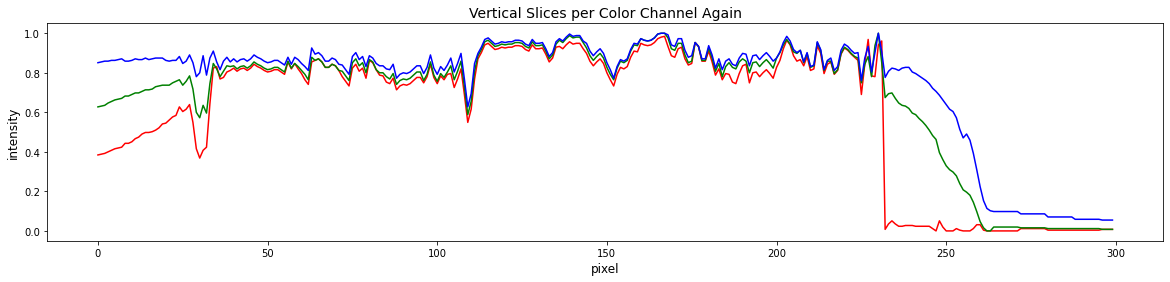

In [65]:
'''Reload the Vertical Slice (View)'''

r_vec = block[:,200,0] # slice the red channel (stack) at column 200
g_vec = block[:,200,1] # slice the green channel (stack) at column 200
b_vec = block[:,200,2] # slice the blue channel (stack) at column 200

plt.plot(range(block.shape[0]),r_vec,'r',g_vec,'g',b_vec,'b') # plot all three slices

plt.title('Vertical Slices per Color Channel Again',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)
plt.show()

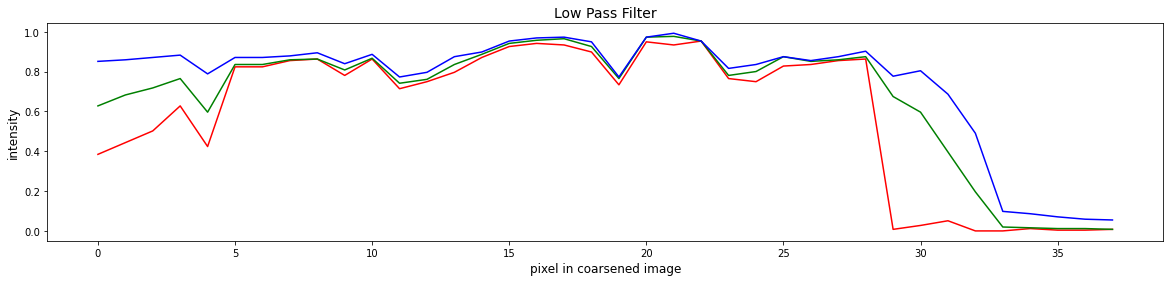

In [66]:
'''Coarsening the Vertical Slice (View)'''

r_vec = block[::8,200,0] # slice the red channel (stack) at column 200
g_vec = block[::8,200,1] # slice the green channel (stack) at column 200
b_vec = block[::8,200,2] # slice the blue channel (stack) at column 200

n_pixels = r_vec.size # length of the coarsened vector

plt.plot(range(n_pixels),r_vec,'r',g_vec,'g',b_vec,'b') # plot all three slices

plt.title('Low Pass Filter',fontsize=14)
plt.xlabel('pixel in coarsened image',fontsize=12)
plt.ylabel('intensity',fontsize=12)

plt.show()

### [Irregular Sampling or Filtering](#toc)<a id="irregularsampling"></a>

Indices used in slicing can be a `list` or a `tuple`. This is particularly useful to access data in an irregular fashion.

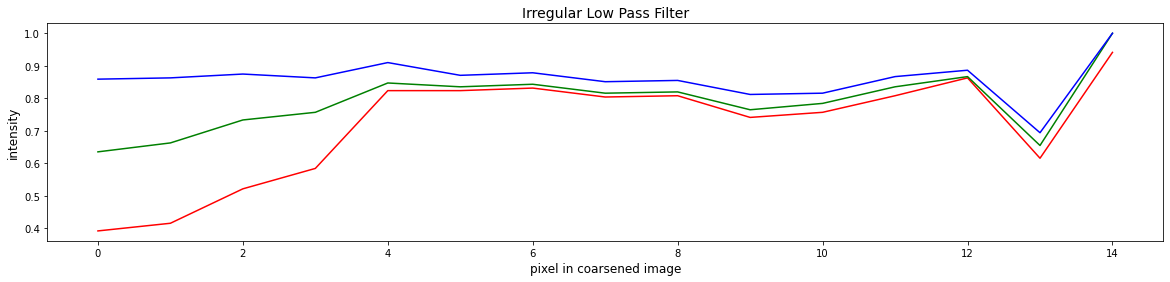

In [67]:
'''Irregular Access to Array Data'''

indices = (2,5,18,23,34,45,47,50,51,62,73,77,80,110,230) # tuple of irregularly spaced indices
#or indices = [2,5,18,23,34,45,47,50,51,62,73,77,80,110,230] # list of irregularly spaced indices
#or indices = np.array([2,5,18,23,34,45,47,50,51,62,73,77,80,110,230]) # vector of irregulary spaced indices

r_vec = block[indices,200,0]
g_vec = block[indices,200,1]
b_vec = block[indices,200,2]

n_pixels = r_vec.size # length of the coarsened vector

plt.plot(range(n_pixels),r_vec,'r',g_vec,'g',b_vec,'b') # plot all three slices

plt.title('Irregular Low Pass Filter',fontsize=14)
plt.xlabel('pixel in coarsened image',fontsize=12)
plt.ylabel('intensity',fontsize=12)

plt.show()

Indices can be created automatically from a search operation, `np.where()`. This is a tricky one!

In [68]:
'''Find the High Red Intensity'''

# Use the where() method from numpy

indices_red = np.where( block[:,200,0] >= 0.85 ) # high intensity red on the column 200

print('type indices_red=',type(indices_red))
print('indices_red =',indices_red)

type indices_red= <class 'tuple'>
indices_red = (array([ 56,  63,  64,  65,  66,  80,  81, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 147, 148, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 176, 177, 178, 179, 180,
       181, 201, 202, 203, 204, 205, 206, 207, 209, 212, 213, 216, 219,
       220, 221, 222, 223, 224, 227, 230, 231]),)


In [69]:
print(type(indices_red[0]))

<class 'numpy.ndarray'>


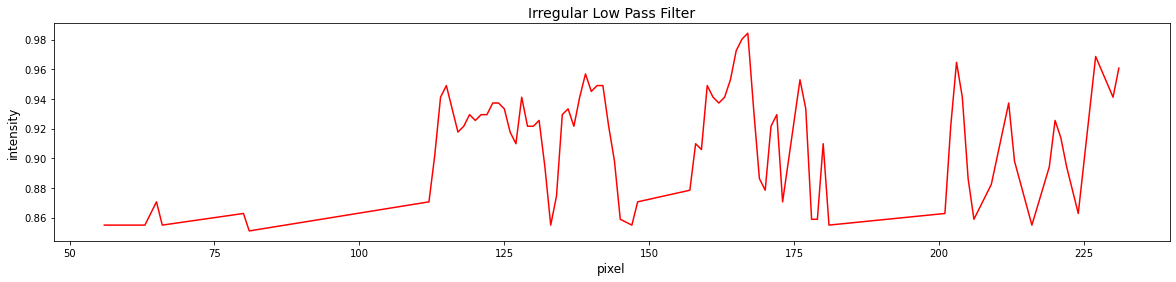

In [70]:
'''Plot the High Red Intensity'''

plt.plot(indices_red[0], block[indices_red[0],200,0], 'r')    # plot red

plt.title('Irregular Low Pass Filter',fontsize=14)
plt.xlabel('pixel',fontsize=12)
plt.ylabel('intensity',fontsize=12)

plt.show()

Searching can be done on any `Numpy` array using `np.where()`.

## [Notable Vectors](#toc)<a id="notablevec"></a>

In [71]:
'''Zeros'''

vec = np.zeros( 4 ) # single argument
print('Vector of zeros\n',vec)

Vector of zeros
 [0. 0. 0. 0.]


In [72]:
'''Ones'''

vec = np.ones( 4 )  # single argument
print('Vector of ones\n',vec)

Vector of ones
 [1. 1. 1. 1.]


In [73]:
'''Any constant'''

vec = np.ones( 4 ) * 12.0  # single argument
print('Vector of 12\n',vec)

Vector of 12
 [12. 12. 12. 12.]


In [74]:
'''Empty (not really)'''

vec = np.empty( 4 )  # single argument
print('Empty vector \n',vec)

vec[:] = 3.8  # initialize
print('Initialized vector\n', vec)

Empty vector 
 [12. 12. 12. 12.]
Initialized vector
 [3.8 3.8 3.8 3.8]


In [75]:
'''Diagonal Vector'''

mtrx = np.random.random( (3,3))
print('Matrix\n',mtrx)

print('')

vec = np.diagonal(mtrx)
print('Diagonal vector\n', vec)

Matrix
 [[0.90713899 0.48663281 0.82121187]
 [0.21145162 0.36055045 0.91959179]
 [0.17805251 0.33275589 0.36527068]]

Diagonal vector
 [0.90713899 0.36055045 0.36527068]


## [Notable Matrices](#toc)<a id="notablemtrx"></a>

### [Zero matrix](#toc)<a id="zeromtrx"></a>

In [76]:
'''Zeros'''

mtrx = np.zeros( (2,3) ) # single argument
print('Ones matrix 2x3\n',mtrx)

Ones matrix 2x3
 [[0. 0. 0.]
 [0. 0. 0.]]


### [All ones matrix](#toc)<a id="onesmtrx"></a>

In [77]:
'''Ones'''

mtrx = np.ones( (4,3) )  # single argument
print('Ones matrix 4x3\n',mtrx)

Ones matrix 4x3
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


### [Any constant matrix](#toc)<a id="ctemtrx"></a>

### [Empty matrix](#toc)<a id="emptymtrx"></a>

In [78]:
'''Empty (not really)'''

mtrx = np.empty( (6,5) )  # single argument
print('Empty mtrx 6x5 \n',mtrx)

mtrx[:,:] = 2.0  # initialize
print('Initialized mtrx 4x5\n', mtrx)

Empty mtrx 6x5 
 [[ 230.72727273  197.64528084  303.19480519  198.9205887   375.66233766]
 [ 202.74651226  448.12987013  198.9205887   520.5974026   214.22428296]
 [ 593.06493506  201.47120441  665.53246753  204.02182012  738.        ]
 [ 195.09466513  810.46753247  196.36997299  882.93506494  182.34158658]
 [ 955.4025974   183.61689443 1027.87012987  200.19589655 1100.33766234]
 [ 206.57243583 1172.80519481  144.08235092 1245.27272727  243.55636364]]
Initialized mtrx 4x5
 [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


### [$\Imtrx$: identity matrix](#toc)<a id="identitymtrx"></a>

In [79]:
'''Identity (square)'''

'''one way'''
mtrx = np.eye(4)
print('Identity matrx 4x4 \n',mtrx)

'''another way'''
mtrx = np.diag( np.ones(4) )
print('Identity matrix 4x4 \n',mtrx)

Identity matrx 4x4 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Identity matrix 4x4 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [80]:
'''Help on Diagonal usage'''

#help(np.diag)

'Help on Diagonal usage'

### [$\Lmtrx$: lower triangular matrix](#toc)<a id="lmtrx"></a>

A matrix with all elements **above the main diagonal** equal to zero.

### [$\Umtrx$: upper triangular matrix](#toc)<a id="umtrx"></a>

A matrix with all elements **below the main diagonal** equal to zero.